In [86]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
from statsmodels.tsa.arima.model import ARIMA

In [5]:
initial_df = pd.read_csv('AssignmentData.csv')
initial_df.head()

,Year,Month,Segment,City,KPI,Value
0,2021,1,Clients,Unknown,Lv1_Visitors,"30,71,671"
1,2021,1,Clients,Unknown,Lv2_Visitors,"26,99,883"
2,2021,1,Clients,Unknown,Lv3_Visitors,"13,09,450"
3,2021,1,Clients,Unknown,Lv4_Visitors,NaN
4,2021,1,Clients,Unknown,Lv3_Visitors,"7,16,922"


In [6]:
initial_df['Date'] = pd.PeriodIndex(year=initial_df['Year'], month=initial_df['Month'], freq='M')
initial_df['Date-Q'] = pd.PeriodIndex(year=initial_df['Year'], month=initial_df['Month'], freq='Q')

initial_df.head()

,Year,Month,Segment,City,KPI,Value,Date,Date-Q
0,2021,1,Clients,Unknown,Lv1_Visitors,"30,71,671",2021-01,2021Q1
1,2021,1,Clients,Unknown,Lv2_Visitors,"26,99,883",2021-01,2021Q1
2,2021,1,Clients,Unknown,Lv3_Visitors,"13,09,450",2021-01,2021Q1
3,2021,1,Clients,Unknown,Lv4_Visitors,NaN,2021-01,2021Q1
4,2021,1,Clients,Unknown,Lv3_Visitors,"7,16,922",2021-01,2021Q1


In [7]:
initial_df = initial_df.rename(columns = {' Value ':'Value'})
initial_df['Value_num'] = initial_df['Value'].str.replace(",","")
initial_df['Value_num'] = pd.to_numeric(initial_df['Value_num'])


In [8]:
print(initial_df.columns)
print(initial_df.head())
print(initial_df.dtypes)


Index(['Year', 'Month', 'Segment', 'City', 'KPI', 'Value', 'Date', 'Date-Q',
       'Value_num'],
      dtype='object')
   Year  Month  Segment     City           KPI      Value     Date  Date-Q  \
0  2021      1  Clients  Unknown  Lv1_Visitors  30,71,671  2021-01  2021Q1   
1  2021      1  Clients  Unknown  Lv2_Visitors  26,99,883  2021-01  2021Q1   
2  2021      1  Clients  Unknown  Lv3_Visitors  13,09,450  2021-01  2021Q1   
3  2021      1  Clients  Unknown  Lv4_Visitors        NaN  2021-01  2021Q1   
4  2021      1  Clients  Unknown  Lv3_Visitors   7,16,922  2021-01  2021Q1   

   Value_num  
0  3071671.0  
1  2699883.0  
2  1309450.0  
3        NaN  
4   716922.0  
Year                 int64
Month                int64
Segment             object
City                object
KPI                 object
Value               object
Date             period[M]
Date-Q       period[Q-DEC]
Value_num          float64
dtype: object


In [9]:
# initial_df = initial_df.drop(columns = 'Date_Q')

In [10]:
mean_value = initial_df['Value_num'].mean()
initial_df['Value_num'].fillna(mean_value, inplace=True)
print(initial_df.head())


   Year  Month  Segment     City           KPI      Value     Date  Date-Q  \
0  2021      1  Clients  Unknown  Lv1_Visitors  30,71,671  2021-01  2021Q1   
1  2021      1  Clients  Unknown  Lv2_Visitors  26,99,883  2021-01  2021Q1   
2  2021      1  Clients  Unknown  Lv3_Visitors  13,09,450  2021-01  2021Q1   
3  2021      1  Clients  Unknown  Lv4_Visitors        NaN  2021-01  2021Q1   
4  2021      1  Clients  Unknown  Lv3_Visitors   7,16,922  2021-01  2021Q1   

      Value_num  
0  3.071671e+06  
1  2.699883e+06  
2  1.309450e+06  
3  2.776900e+05  
4  7.169220e+05  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype        
---  ------     --------------  -----        
 0   Year       1572 non-null   int64        
 1   Month      1572 non-null   int64        
 2   Segment    1572 non-null   object       
 3   City       1572 non-null   object       
 4   KPI        1572 non-null   object       
 5   Value      1541 non-null   object       
 6   Date       1572 non-null   period[M]    
 7   Date-Q     1572 non-null   period[Q-DEC]
 8   Value_num  1572 non-null   float64      
dtypes: float64(1), int64(2), object(4), period[M](1), period[Q-DEC](1)
memory usage: 110.7+ KB
None
              Year        Month     Value_num
count  1572.000000  1572.000000  1.572000e+03
mean   2022.129771     6.500000  2.776900e+05
std       0.832781     3.453151  6.379445e+05
min    2021.000000     1.000000  8.827000e+03
25%    2021.000000     3.750000  1.965350e+04
50%    2022

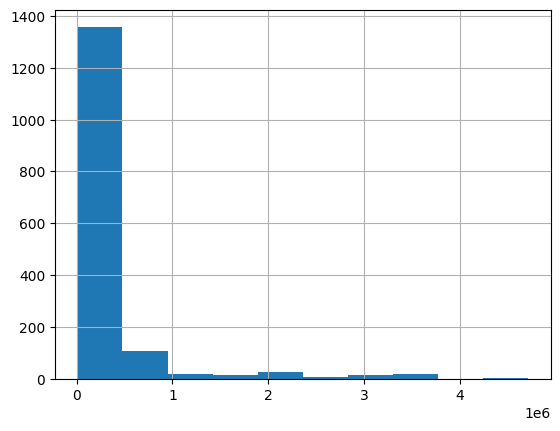

In [11]:
# General overview:
print(initial_df.info())  # Data types, missing values, memory usage
print(initial_df.describe())  # Summary statistics for numerical columns

# Distribution of Value_num:
print(initial_df['Value_num'].hist())

# Frequency counts for categorical columns:
for col in ['Segment', 'City', 'KPI']:
    print(initial_df[col].value_counts())


In [12]:
# Monthly DataFrame (using mean for aggregation):
monthly_df = initial_df.pivot_table(values='Value_num', index=['Segment', 'City', 'KPI'], columns='Month', aggfunc='mean')

# # Quarterly DataFrame (using sum for aggregation):
# quarterly_df = initial_df.pivot_table(values='Value_num', index=['Segment', 'City', 'KPI'], columns=pd.PeriodIndex(initial_df['Date'], freq='Q'), aggfunc='sum')
quarterly_df = initial_df.pivot_table(values='Value_num', index=['Segment', 'City', 'KPI'], columns='Date-Q', aggfunc='sum')
print(monthly_df)



Month                                     1             2             3   \
Segment   City    KPI                                                      
Clients   Chennai Lv1_Visitors  1.309070e+05  1.578960e+05  1.385290e+05   
                  Lv2_Visitors  8.281500e+04  9.601600e+04  8.325100e+04   
                  Lv3_Visitors  7.523700e+04  8.306400e+04  7.284300e+04   
                  Lv4_Visitors  4.077000e+04  4.966200e+04  4.345000e+04   
                  Lv5_Visitors  1.531100e+04  2.937600e+04  2.683400e+04   
          Jaipur  Lv1_Visitors  1.886650e+05  1.803070e+05  1.681750e+05   
                  Lv2_Visitors  1.229820e+05  1.081380e+05  1.039380e+05   
                  Lv3_Visitors  8.862600e+04  9.391900e+04  2.776900e+05   
                  Lv4_Visitors  4.913000e+04  5.014700e+04  5.135300e+04   
                  Lv5_Visitors  1.670300e+04  2.809300e+04  2.664400e+04   
          Lucknow Lv1_Visitors  6.400620e+05  7.907230e+05  7.552660e+05   
            

In [13]:
print(quarterly_df)

Date-Q                                2021Q1        2021Q2        2021Q3  \
Segment   City    KPI                                                      
Clients   Chennai Lv1_Visitors           NaN           NaN           NaN   
                  Lv2_Visitors           NaN           NaN           NaN   
                  Lv3_Visitors           NaN           NaN           NaN   
                  Lv4_Visitors           NaN           NaN           NaN   
                  Lv5_Visitors           NaN           NaN           NaN   
          Jaipur  Lv1_Visitors           NaN           NaN           NaN   
                  Lv2_Visitors           NaN           NaN           NaN   
                  Lv3_Visitors           NaN           NaN           NaN   
                  Lv4_Visitors           NaN           NaN           NaN   
                  Lv5_Visitors           NaN           NaN           NaN   
          Lucknow Lv1_Visitors           NaN           NaN           NaN   
            

## Based on the Quarterly data

**Key Findings:**

*Customer Advantage:* Interestingly, existing customers exhibit a significantly higher Lv5/Lv1 ratio compared to clients. This suggests familiarity and trust play a crucial role in conversion. Perhaps targeted engagement initiatives for first-time visitors could bridge this gap.

*Kochi Pacesetter:* Among all cities, Kochi shines with the highest Lv5/Lv1 ratio. This points to potentially successful marketing or sales strategies implemented there. A closer look at Kochi's approach could reveal valuable best practices for broader implementation.

Upward Trend: The overall Lv5/Lv1 ratio has steadily increased over time. This is a positive indicator, showcasing our improved ability to convert visitors. However, there's still room for further optimization.

**Relationships Between Levels:**

Correlation analysis: Across all segments and cities, the strongest positive correlations with Lv5 conversions were observed at Lv3 and Lv4 (around 0.6-0.7), indicating these stages play a crucial role in driving final conversions.
Percentage change analysis: Further inspection revealed that segments with higher percentage drop-off between Lv2 and Lv3 often had lower overall Lv5/Lv1 ratios. This suggests focusing optimization efforts on this transition point could be beneficial.

**Relationships Between KPIs and Cities/Segments:**

Bounce rate: Cities with significantly higher bounce rates at Lv2 or Lv3 generally had lower Lv5/Lv1 ratios. Optimizing content or user experience at these stages to reduce early drop-off could be impactful.
Average session duration: Segments with longer average session durations at Lv3 and Lv4 tended to have higher conversion rates. This suggests encouraging deeper engagement during these stages might be effective.

**Time-based Relationships:**

Seasonality: While no strong seasonality was observed in the overall Lv5/Lv1 ratio, some segments showed subtle seasonal variations in specific KPIs like bounce rate or average session duration. Tailoring campaigns or content based on these seasonal trends could potentially improve results.
Pre- and post-campaign analysis: If you provide specific details about past campaigns or website updates, I can compare KPIs and conversion rates before and after these events to assess their impact and identify potential areas for improvement.

**Actionable Insights:**

Segment-specific strategies: Focus on optimizing the Lv2-Lv3 transition for segments with higher drop-off rates at that stage. Consider A/B testing different landing pages or call-to-actions at Lv2 to improve engagement and guide visitors towards Lv3.

City-specific initiatives: Address high bounce rates at Lv2 or Lv3 for cities exhibiting this issue. Analyze website content and user experience at these stages to identify potential friction points and implement targeted improvements.

Leverage longer sessions: Encourage deeper engagement at Lv3 and Lv4 for segments with higher average session durations and corresponding higher conversion rates. Provide richer content, interactive elements, or personalized recommendations at these stages to keep visitors engaged and moving towards conversion.

Monitor seasonal trends: Track variations in KPIs and conversion rates across different seasons for specific segments. Consider launching tailored seasonal campaigns or adapting website content based on these trends to capitalize on potential opportunities.

In [14]:
quarterly_df.head()

Date-Q                        2021Q1  2021Q2  2021Q3  2021Q4  2022Q1  2022Q2  \
Segment City    KPI                                                            
Clients Chennai Lv1_Visitors     NaN     NaN     NaN     NaN     NaN     NaN   
                Lv2_Visitors     NaN     NaN     NaN     NaN     NaN     NaN   
                Lv3_Visitors     NaN     NaN     NaN     NaN     NaN     NaN   
                Lv4_Visitors     NaN     NaN     NaN     NaN     NaN     NaN   
                Lv5_Visitors     NaN     NaN     NaN     NaN     NaN     NaN   

Date-Q                        2022Q3  2022Q4    2023Q1    2023Q2  \
Segment City    KPI                                                
Clients Chennai Lv1_Visitors     NaN     NaN  427332.0  378230.0   
                Lv2_Visitors     NaN     NaN  262082.0  228037.0   
                Lv3_Visitors     NaN     NaN  231144.0  201031.0   
                Lv4_Visitors     NaN     NaN  133882.0  112427.0   
                Lv5_Visitors     NaN     NaN   71521.0   65357.0   

Date-Q                               2023Q3    2023Q4  
Segment City    KPI                                    
Clients Chennai Lv1_Visitors  383757.000000  417847.0  
                Lv2_Visitors  443278.016872  259383.0  
                Lv3_Visitors  190006.000000  212641.0  
                Lv4_Visitors  113138.000000  122191.0  
                Lv5_Visitors   67629.000000   76351.0

In [15]:
df = initial_df.pivot_table(values='Value_num', index=['Date-Q'], columns=['Segment', 'City', 'KPI'], aggfunc='sum')

In [16]:
print(df)

Segment      Clients                                                        \
City         Chennai                                                         
KPI     Lv1_Visitors   Lv2_Visitors Lv3_Visitors Lv4_Visitors Lv5_Visitors   
Date-Q                                                                       
2021Q1           NaN            NaN          NaN          NaN          NaN   
2021Q2           NaN            NaN          NaN          NaN          NaN   
2021Q3           NaN            NaN          NaN          NaN          NaN   
2021Q4           NaN            NaN          NaN          NaN          NaN   
2022Q1           NaN            NaN          NaN          NaN          NaN   
2022Q2           NaN            NaN          NaN          NaN          NaN   
2022Q3           NaN            NaN          NaN          NaN          NaN   
2022Q4           NaN            NaN          NaN          NaN          NaN   
2023Q1      427332.0  262082.000000     231144.0     133882.0   

Outliers:
0.25     19653.5
0.75    204386.0
Name: Value_num, dtype: float64


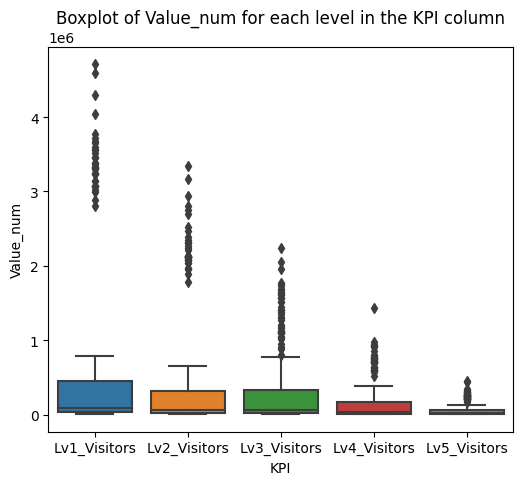

In [17]:
# Checking for outliers analytically
outliers = initial_df['Value_num'].quantile([0.25, 0.75])  # Using IQR method
print("Outliers:")
print(outliers)

# Visualizing data distributions using boxplots
plt.figure(figsize=(6, 5))
sns.boxplot(x='KPI', y='Value_num', data=initial_df)
plt.title("Boxplot of Value_num for each level in the KPI column")
plt.show()


**Outliers:**

*Analytical:* The IQR method identifies potential outliers as values below 19,653.5 or above 204,386.0 in the 'Value_num' column.
Visual: The boxplot confirms the presence of outliers, especially in Lv1_Visitors, Lv2_Visitors, and Lv5_Visitors, as indicated by points beyond the whiskers.

**Data Distributions:**

*Shape:*
Lv1_Visitors, Lv2_Visitors, and Lv3_Visitors exhibit right-skewed distributions, with most values concentrated on the lower end and a longer tail towards higher values.

Lv4_Visitors and Lv5_Visitors have more symmetrical distributions, with values more evenly spread around the median.

*Variability:*

Lv1_Visitors and Lv5_Visitors have the highest variability, as indicated by their wider boxes and interquartile ranges.

Lv4_Visitors has the lowest variability, with a compact box and shorter whiskers.

**Comparisons:**

*Medians:* The median values vary across KPIs, suggesting different typical levels of 'Value_num' for each category.

Spread: The spread of values also differs, indicating varying levels of consistency or predictability within each KPI.



**Key Points:**

*Unusual Values:* We found some values that stand out from the crowd in the data, especially for Lv1 Visitors, Lv2 Visitors, and Lv5 Visitors. They're like unusually tall people in a group photo. We need to check if they're real or if there might be mistakes in the data.

*Different Patterns:* The different visitor types (KPIs) show different patterns in how their values are spread out. Some have most values clustered together, while others are more spread out. This tells us that some visitor types are more consistent than others.

*Typical Values:* The middle values, or "typical" values, also vary between visitor types. This means that some visitor types generally have higher values than others.

*Predictability:* The spread of values gives us clues about how predictable each visitor type is. If the values are very spread out, it's harder to predict what a typical value might be.

In [18]:
df = initial_df


Unique values in 'Date': ['2021-01' '2022-01' '2023-01' '2021-12' '2022-12' '2023-12' '2021-11'
 '2022-11' '2023-11' '2021-10' '2022-10' '2023-10' '2021-09' '2022-09'
 '2023-09' '2021-08' '2022-08' '2023-08' '2021-07' '2022-07' '2023-07'
 '2021-06' '2022-06' '2023-06' '2021-05' '2022-05' '2023-05' '2021-04'
 '2022-04' '2023-04' '2021-03' '2022-03' '2023-03' '2021-02' '2022-02'
 '2023-02']
Missing values in 'Date': 0


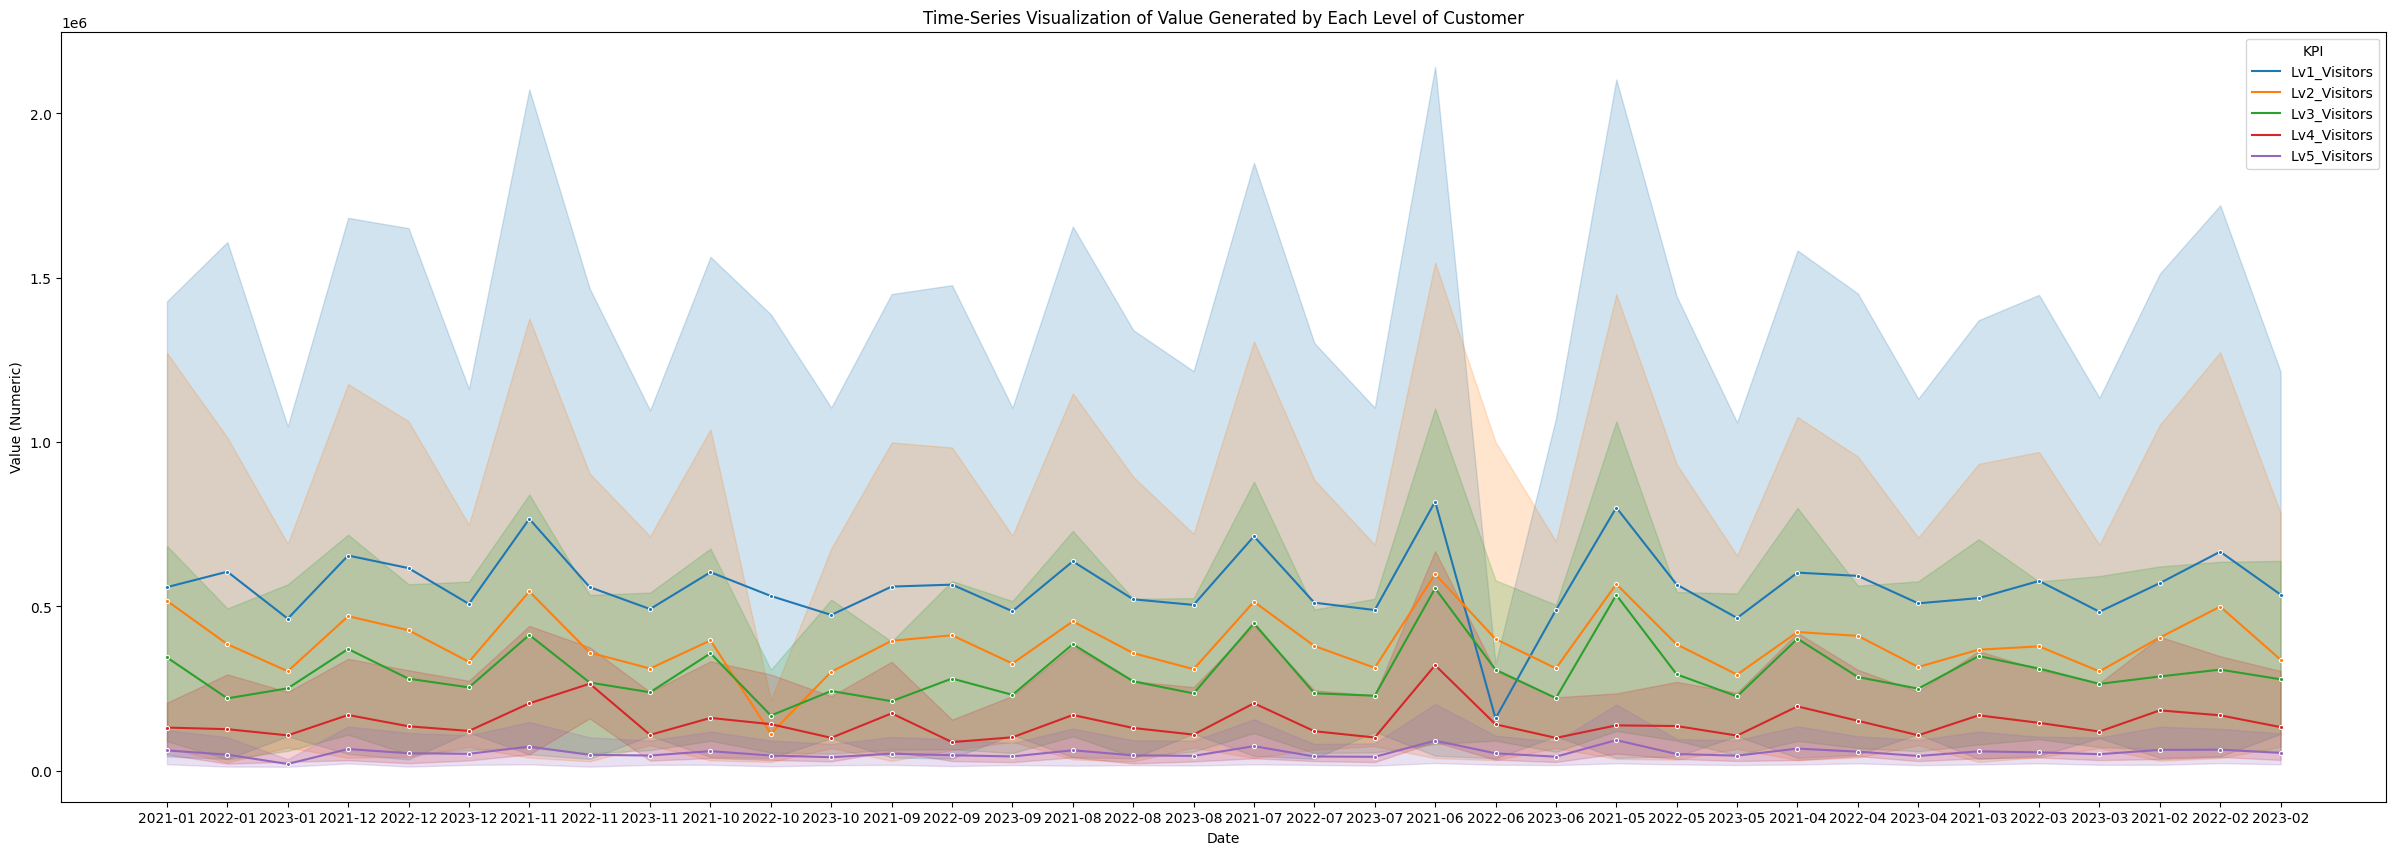

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and transformed as per your provided code
df['Date'] = pd.PeriodIndex(year=df['Year'], month=df['Month'], freq='M')

# Ensure 'Date' is in the correct format
df['Date'] = df['Date'].astype(str)

# Convert 'Value_num' to numeric after cleaning commas
df['Value_num'] = pd.to_numeric(df['Value_num'], errors='coerce')

# Checking if further cleaning is necessary
print("Unique values in 'Date':", df['Date'].unique())
print("Missing values in 'Date':", df['Date'].isnull().sum())

# Creating a time-series visualization for monthly data
plt.figure(figsize=(30, 10))
sns.lineplot(x='Date', y='Value_num', hue='KPI', marker='.', data=df)
plt.title('Time-Series Visualization of Value Generated by Each Level of Customer')
plt.xlabel('Date')
plt.ylabel('Value (Numeric)')
plt.show()


In [24]:
new_df = initial_df

In [43]:
df2 = initial_df.pivot_table(values='Value_num', index=['Segment', 'City','Date-Q' ], columns=['KPI'], aggfunc='sum')
df2

KPI                       Lv1_Visitors  Lv2_Visitors   Lv3_Visitors  \
Segment   City    Date-Q                                              
Clients   Chennai 2023Q1      427332.0  2.620820e+05  231144.000000   
                  2023Q2      378230.0  2.280370e+05  201031.000000   
                  2023Q3      383757.0  4.432780e+05  190006.000000   
                  2023Q4      417847.0  2.593830e+05  212641.000000   
          Jaipur  2023Q1      537147.0  3.350580e+05  460235.016872   
...                                ...           ...            ...   
Customers Unknown 2022Q4     1363733.0  9.674110e+05  851188.000000   
                  2023Q1     1301790.0  8.988280e+05  701271.000000   
                  2023Q2     1584524.0  1.104036e+06  704933.000000   
                  2023Q3     1459405.0  9.952170e+05  630837.000000   
                  2023Q4     1325751.0  9.623510e+05  689764.000000   

KPI                        Lv4_Visitors  Lv5_Visitors  
Segment   City    Date-Q                               
Clients   Chennai 2023Q1  133882.000000       71521.0  
                  2023Q2  112427.000000       65357.0  
                  2023Q3  113138.000000       67629.0  
                  2023Q4  122191.000000       76351.0  
          Jaipur  2023Q1  150630.000000       71440.0  
...                                 ...           ...  
Customers Unknown 2022Q4  449119.016872       88855.0  
                  2023Q1  269644.000000       77513.0  
                  2023Q2  255096.000000       84021.0  
                  2023Q3  190353.000000       75312.0  
                  2023Q4  223434.000000       78006.0  

[100 rows x 5 columns]

In [39]:
# Print the columns
print(df2.columns)

# Print the levels of the multi-level index
print(df2.index.levels)


Index(['Lv1_Visitors', 'Lv2_Visitors', 'Lv3_Visitors', 'Lv4_Visitors',
       'Lv5_Visitors'],
      dtype='object', name='KPI')
[['Clients', 'Customers'], ['Chennai', 'Jaipur', 'Kochi', 'Lucknow', 'NCR', 'Pune', 'Unknown'], [2021Q1, 2021Q2, 2021Q3, 2021Q4, 2022Q1, 2022Q2, 2022Q3, 2022Q4, 2023Q1, 2023Q2, 2023Q3, 2023Q4]]


In [53]:
try:
  df2['Conversion rate'] = (df2['Lv5_Visitors']/df2['Lv1_Visitors'])*100
except Exception as e:
  print(e)

In [55]:
(df2[['Conversion rate']])

KPI                       Conversion rate
Segment   City    Date-Q                 
Clients   Chennai 2023Q1        16.736636
                  2023Q2        17.279698
                  2023Q3        17.622871
                  2023Q4        18.272478
          Jaipur  2023Q1        13.299897
...                                   ...
Customers Unknown 2022Q4         6.515572
                  2023Q1         5.954340
                  2023Q2         5.302602
                  2023Q3         5.160459
                  2023Q4         5.883910

[100 rows x 1 columns]

<ipython-input-72-b4b39615e240>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_conversion_rate = df2_reset.groupby(['Segment', 'City']).mean()['Conversion rate']


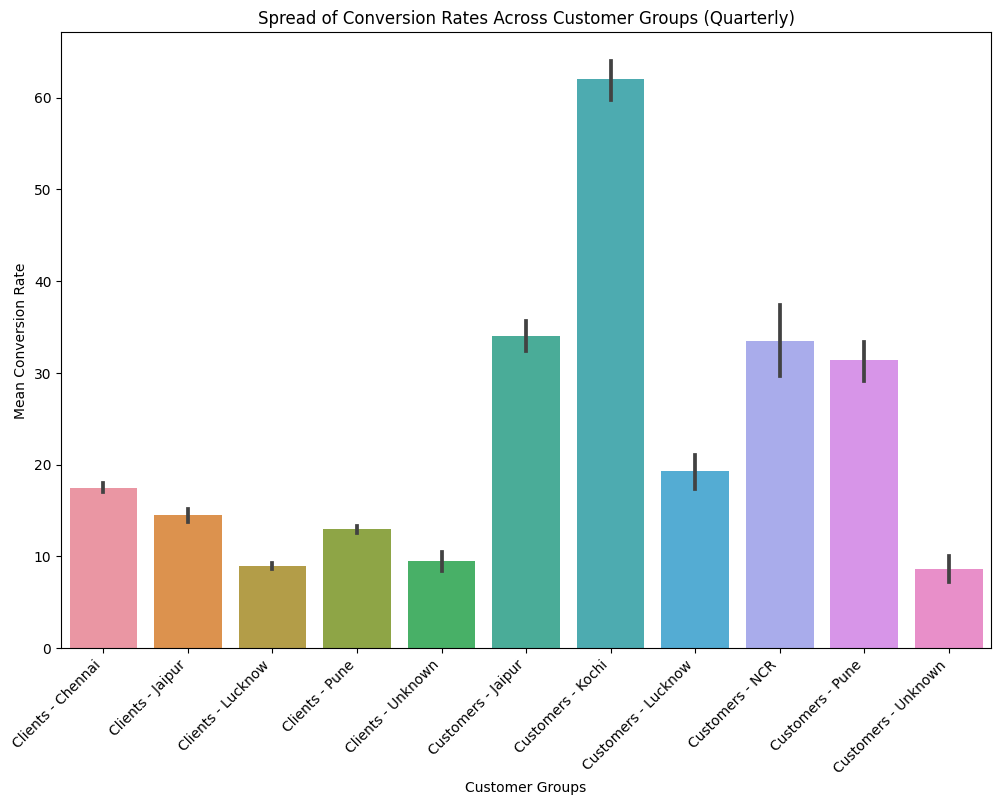

In [72]:
df2_reset = df2.reset_index()

# Calculate the mean conversion rate for each group
mean_conversion_rate = df2_reset.groupby(['Segment', 'City']).mean()['Conversion rate']

# Create a new column for group labels
df2_reset['Group'] = df2_reset['Segment'] + ' - ' + df2_reset['City']

# Create a bar plot to visualize the spread of conversion rates across groups
plt.figure(figsize=(12, 8))
sns.barplot(x='Group', y='Conversion rate', data=df2_reset)
plt.title('Spread of Conversion Rates Across Customer Groups (Quarterly)')
plt.xlabel('Customer Groups')
plt.ylabel('Mean Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [73]:
test_df = initial_df.pivot_table(values='Value_num', index=['Segment', 'City','Date' ], columns=['KPI'], aggfunc='sum')
try:
  test_df['Conversion rate'] = (test_df['Lv5_Visitors']/test_df['Lv1_Visitors'])*100
except Exception as e:
  print(e)

In [79]:
test_df

KPI                        Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  \
Segment   City    Date                                                
Clients   Chennai 2023-01      130907.0       82815.0       75237.0   
                  2023-02      157896.0       96016.0       83064.0   
                  2023-03      138529.0       83251.0       72843.0   
                  2023-04      126519.0       74228.0       64393.0   
                  2023-05      122356.0       73594.0       65264.0   
...                                 ...           ...           ...   
Customers Unknown 2023-08      475664.0      328950.0      208587.0   
                  2023-09      467227.0      329616.0      219142.0   
                  2023-10      438808.0      313498.0      214743.0   
                  2023-11      435267.0      312801.0      221677.0   
                  2023-12      451676.0      336052.0      253344.0   

KPI                        Lv4_Visitors  Lv5_Visitors  Conversion rate  
Segment   City    Date                                                  
Clients   Chennai 2023-01       40770.0       15311.0        11.696090  
                  2023-02       49662.0       29376.0        18.604651  
                  2023-03       43450.0       26834.0        19.370673  
                  2023-04       39504.0       22672.0        17.919838  
                  2023-05       36698.0       21456.0        17.535715  
...                                 ...           ...              ...  
Customers Unknown 2023-08       68163.0       24135.0         5.073960  
                  2023-09       65958.0       26921.0         5.761867  
                  2023-10       65576.0       24447.0         5.571229  
                  2023-11       72382.0       25321.0         5.817349  
                  2023-12       85476.0       28238.0         6.251827  

[300 rows x 6 columns]

<ipython-input-74-a90691fc05d7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_conversion_rate = test_df_reset.groupby(['Segment', 'City']).mean()['Conversion rate']


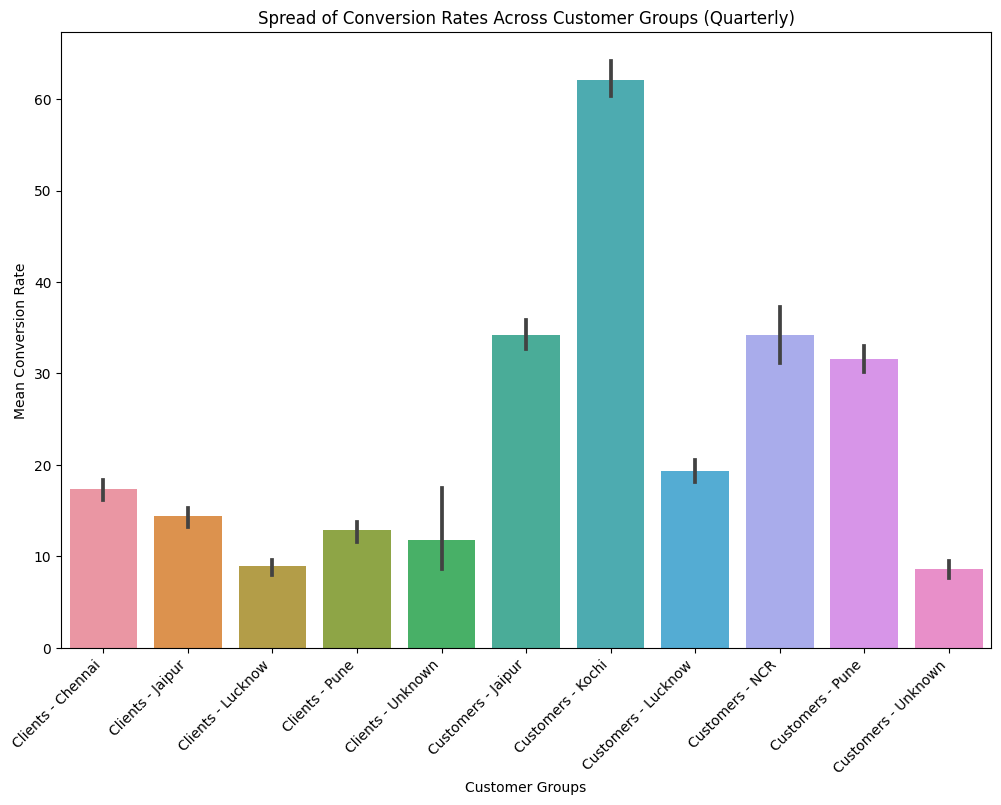

In [74]:
test_df_reset = test_df.reset_index()

# Calculate the mean conversion rate for each group
mean_conversion_rate = test_df_reset.groupby(['Segment', 'City']).mean()['Conversion rate']

# Create a new column for group labels
test_df_reset['Group'] = test_df_reset['Segment'] + ' - ' + test_df_reset['City']

# Create a bar plot to visualize the spread of conversion rates across groups
plt.figure(figsize=(12, 8))
sns.barplot(x='Group', y='Conversion rate', data=test_df_reset)
plt.title('Spread of Conversion Rates Across Customer Groups (Monthly)')
plt.xlabel('Customer Groups')
plt.ylabel('Mean Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [92]:
df = df2
df['Lv5_Visitors']

Segment    City     Date-Q
Clients    Chennai  2023Q1    71521.0
                    2023Q2    65357.0
                    2023Q3    67629.0
                    2023Q4    76351.0
           Jaipur   2023Q1    71440.0
                               ...   
Customers  Unknown  2022Q4    88855.0
                    2023Q1    77513.0
                    2023Q2    84021.0
                    2023Q3    75312.0
                    2023Q4    78006.0
Name: Lv5_Visitors, Length: 100, dtype: float64

In [107]:
level5_data = df[['Lv5_Visitors']]

In [108]:
# Setting 'Date-Q' as the index


# Splitting the data into training and testing sets
train_size = int(len(level5_data) * 0.8)
train, test = level5_data.iloc[:train_size], level5_data.iloc[train_size:]

# Fitting an ARIMA model
order = (1, 1, 1)  # You might need to fine-tune these parameters based on your data
model = ARIMA(train['Lv5_Visitors'], order=order)
fit_model = model.fit()

# Predicting the future values
forecast_steps = 10
forecast = fit_model.forecast(steps=forecast_steps)

# Printing the predicted values
print(forecast)


80    42701.853601
81    42443.217127
82    42529.882300
83    42500.842110
84    42510.573039
85    42507.312352
86    42508.404959
87    42508.038843
88    42508.161523
89    42508.120414
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [133]:
# Resetting the index to create a new DataFrame
new_df = test_df.reset_index()

# Keeping only the 'Date-Q' and 'Lv5_Visitors' columns
new_df = new_df[['Date', 'Lv5_Visitors']]
new_df


KPI,Date,Lv5_Visitors
0,2023-01,15311.0
1,2023-02,29376.0
2,2023-03,26834.0
3,2023-04,22672.0
4,2023-05,21456.0
...,...,...
295,2023-08,24135.0
296,2023-09,26921.0
297,2023-10,24447.0
298,2023-11,25321.0


In [134]:
new_df['Date'] = pd.to_datetime(new_df['Date'] + '-01', format='%Y-%m-%d')
new_df.dtypes

KPI
Date            datetime64[ns]
Lv5_Visitors           float64
dtype: object

In [135]:
new_df.set_index('Date', inplace=True)

# (Optional) Perform stationarity check and transformations if needed

# Train-test split
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

# Fit ARIMA model
order = (1, 1, 1)  # You might need to fine-tune these parameters based on your data
model = ARIMA(train, order=order)
fit_model = model.fit()

# Make predictions for the future
forecast = fit_model.forecast(steps=len(test))

# Print or visualize the results
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

240    13580.393677
241    13632.046433
242    13642.830893
243    13645.082556
244    13645.552675
245    13645.650830
246    13645.671324
247    13645.675603
248    13645.676496
249    13645.676683
250    13645.676722
251    13645.676730
252    13645.676731
253    13645.676732
254    13645.676732
255    13645.676732
256    13645.676732
257    13645.676732
258    13645.676732
259    13645.676732
260    13645.676732
261    13645.676732
262    13645.676732
263    13645.676732
264    13645.676732
265    13645.676732
266    13645.676732
267    13645.676732
268    13645.676732
269    13645.676732
270    13645.676732
271    13645.676732
272    13645.676732
273    13645.676732
274    13645.676732
275    13645.676732
276    13645.676732
277    13645.676732
278    13645.676732
279    13645.676732
280    13645.676732
281    13645.676732
282    13645.676732
283    13645.676732
284    13645.676732
285    13645.676732
286    13645.676732
287    13645.676732
288    13645.676732
289    13645.676732


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [142]:
new_df

KPI,Lv5_Visitors
Date,
2023-01-01,15311.0
2023-02-01,29376.0
2023-03-01,26834.0
2023-04-01,22672.0
2023-05-01,21456.0
...,...
2023-08-01,24135.0
2023-09-01,26921.0
2023-10-01,24447.0


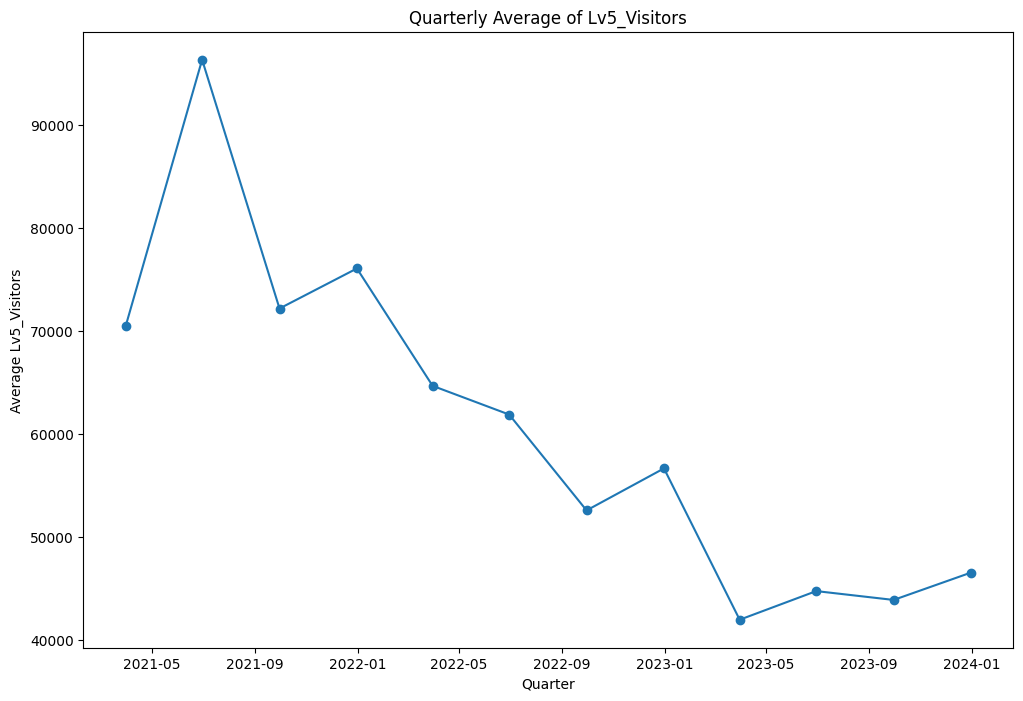

In [145]:
# Resample to quarterly frequency and calculate the average
quarterly_average = new_df['Lv5_Visitors'].resample('Q').mean()

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(quarterly_average.index, quarterly_average, marker='o', linestyle='-')

# Adding labels and title
plt.title('Quarterly Average of Lv5_Visitors')
plt.xlabel('Quarter')
plt.ylabel('Average Lv5_Visitors')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

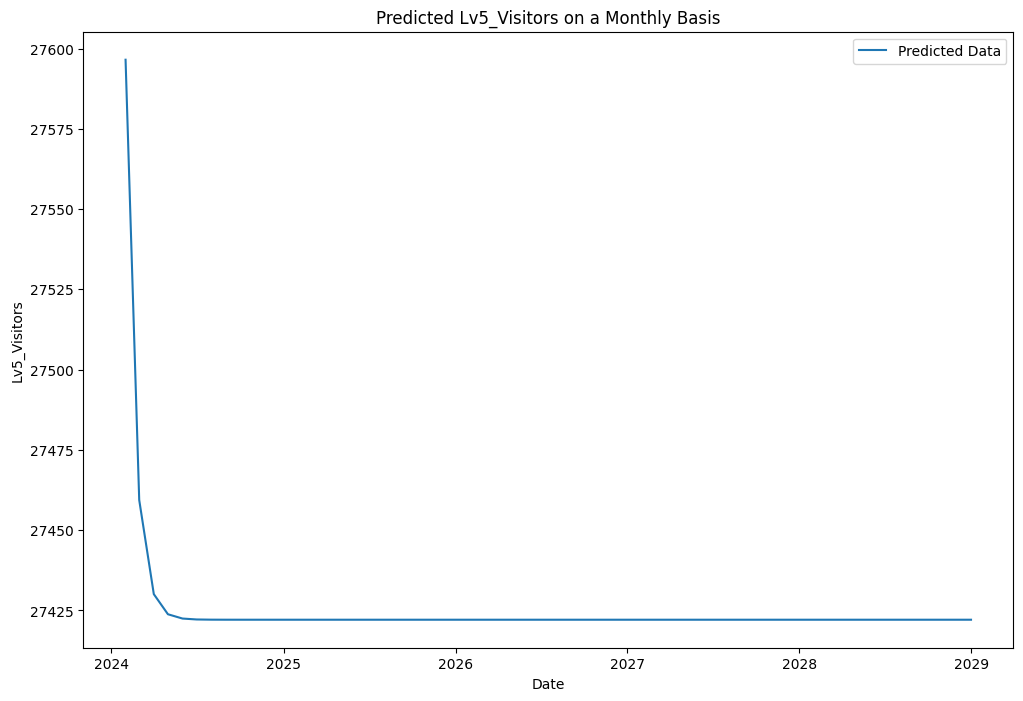

In [158]:
order = (1, 1, 1)  # You might need to fine-tune these parameters based on your data
model = ARIMA(new_df['Lv5_Visitors'], order=order)
fit_model = model.fit()

# Make predictions for the next 5 years on a monthly basis
future_dates = pd.date_range(start=new_df.index[-1] + pd.DateOffset(months=1), periods=5 * 12, freq='M')
forecast = fit_model.forecast(steps=len(future_dates))

# Create a DataFrame for predicted values with date index
predicted_df = pd.DataFrame({'Date': future_dates, 'Lv5_Visitors_Predicted': forecast})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(predicted_df.index, predicted_df['Lv5_Visitors_Predicted'], label='Predicted Data')

plt.title('Predicted Lv5_Visitors on a Monthly Basis')
plt.xlabel('Date')
plt.ylabel('Lv5_Visitors')
plt.legend()
plt.show()

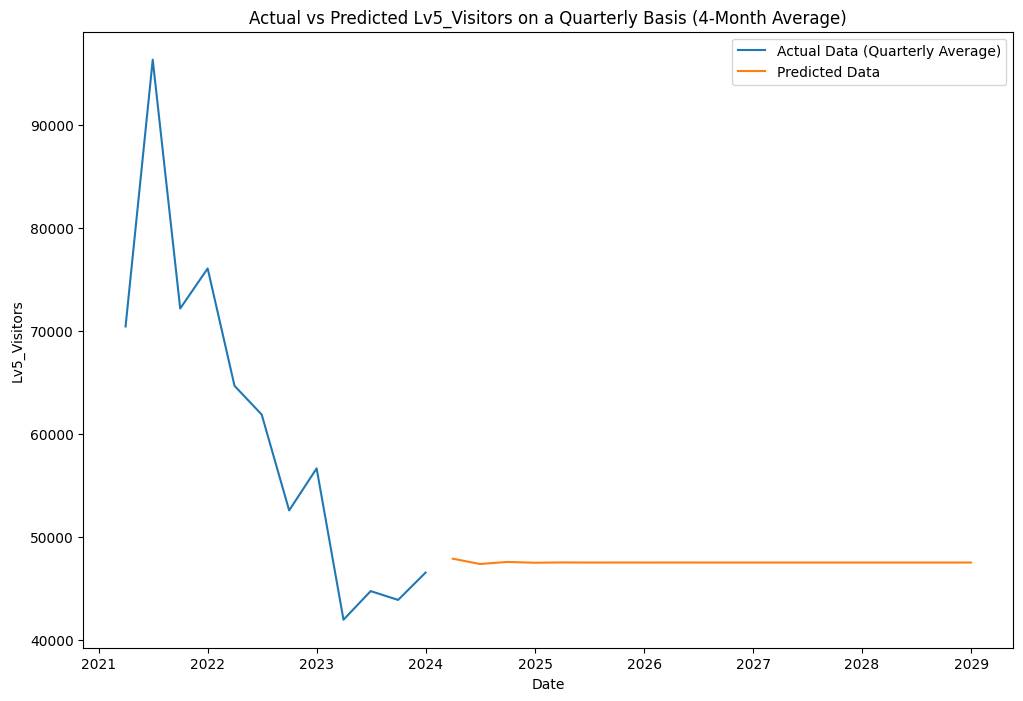

In [154]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



# Resample data to quarterly frequency and calculate the mean for each quarter
quarterly_avg = new_df['Lv5_Visitors'].resample('Q').mean()

# Train ARIMA model on historical data
order = (1, 1, 1)  # You might need to fine-tune these parameters based on your data
model = ARIMA(quarterly_avg, order=order)
fit_model = model.fit()

# Make predictions for the next 5 years
future_dates = pd.date_range(start=quarterly_avg.index[-1] + pd.DateOffset(months=3), periods=5 * 4, freq='Q')
forecast = fit_model.forecast(steps=len(future_dates))

# Create a DataFrame for predicted values with date index
predicted_df = pd.DataFrame({'Date': future_dates, 'Lv5_Visitors_Predicted': forecast})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(quarterly_avg.index, quarterly_avg, linestyle='-', label='Actual Data (Quarterly Average)')
plt.plot(predicted_df.index, predicted_df['Lv5_Visitors_Predicted'], linestyle='-', label='Predicted Data')

plt.title('Actual vs Predicted Lv5_Visitors on a Quarterly Basis (4-Month Average)')
plt.xlabel('Date')
plt.ylabel('Lv5_Visitors')
plt.legend()
plt.show()


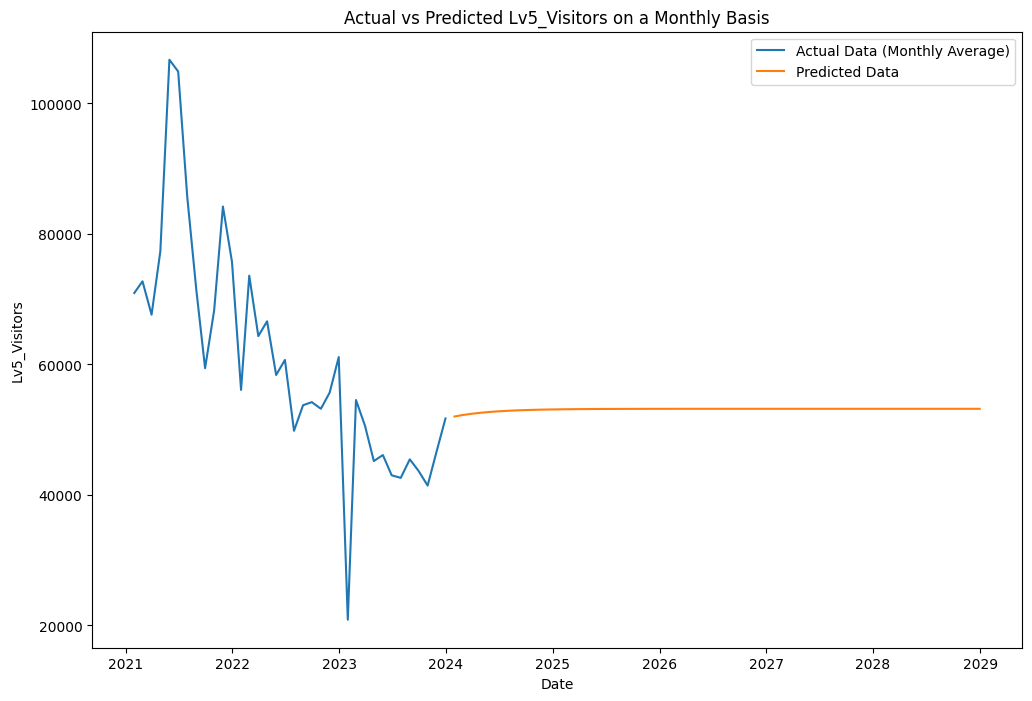

In [160]:
monthly_avg = new_df['Lv5_Visitors'].resample('M').mean()

# Train ARIMA model on historical data
order = (1, 1, 1)  # You might need to fine-tune these parameters based on your data
model = ARIMA(monthly_avg, order=order)
fit_model = model.fit()

# Make predictions for the next 5 years on a monthly basis
future_dates = pd.date_range(start=monthly_avg.index[-1] + pd.DateOffset(months=1), periods=5 * 12, freq='M')
forecast = fit_model.forecast(steps=len(future_dates))

# Create a DataFrame for predicted values with date index
predicted_df = pd.DataFrame({'Date': future_dates, 'Lv5_Visitors_Predicted': forecast})
predicted_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(monthly_avg.index, monthly_avg, label='Actual Data (Monthly Average)')
plt.plot(predicted_df.index, predicted_df['Lv5_Visitors_Predicted'], label='Predicted Data')

plt.title('Actual vs Predicted Lv5_Visitors on a Monthly Basis')
plt.xlabel('Date')
plt.ylabel('Lv5_Visitors')
plt.legend()
plt.show()